<h1 align="center"><strong>Missing value handling code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
sns.set_theme()

In [2]:
data = {
    # Categorical column with dominant category missingness
    "Category_Mode": np.random.choice(["A", "B", "C"], size=15, p=[0.6, 0.3, 0.1]).astype(object),
    
    # Categorical column where missingness is informative (set as Unknown later)
    "Category_Unknown": np.random.choice(["X", "Y"], size=15, p=[0.5, 0.5]).astype(object),
    
    # Numerical column, approximately normal distribution (best: Mean)
    "Num_Normal": np.random.normal(loc=50, scale=10, size=15),
    
    # Numerical column, skewed distribution (best: Median)
    "Num_Skewed": np.random.exponential(scale=20, size=15),
    
    # Discrete numeric (like categorical-like, best: Mode)
    "Num_Discrete": np.random.choice([1, 2, 3, 4, 5], size=15),
    
    # Time series values (will add missing)
    "Time_Series_1": np.arange(100, 115),
    "Time_Series_2": np.arange(100, 115),
    "Time_Series_3": np.arange(100, 115)
}

df = pd.DataFrame(data)

# Insert NaNs in different patterns
df.loc[[2, 5, 7], "Category_Mode"] = np.nan
df.loc[[1, 6, 10], "Category_Unknown"] = np.nan
df.loc[[3, 8, 12], "Num_Normal"] = np.nan
df.loc[[0, 9, 14], "Num_Skewed"] = np.nan
df.loc[[4, 11, 13], "Num_Discrete"] = np.nan
df.loc[[2, 6, 9], "Time_Series_1"] = np.nan
df.loc[[1, 5, 10], "Time_Series_2"] = np.nan
df.loc[[3, 7, 12], "Time_Series_3"] = np.nan

display(df)
display(df.shape)
df.isnull().sum().to_frame().rename(columns={0:'Total No. of Missing Values'})

,Category_Mode,Category_Unknown,Num_Normal,Num_Skewed,Num_Discrete,Time_Series_1,Time_Series_2,Time_Series_3
0,A,X,38.490064,NaN,4.0,100.0,100.0,100.0
1,C,NaN,53.756980,4.362694,3.0,101.0,NaN,101.0
2,NaN,Y,43.993613,0.925639,3.0,NaN,102.0,102.0
3,A,X,NaN,7.870642,1.0,103.0,103.0,NaN
4,A,X,43.982934,9.842606,NaN,104.0,104.0,104.0
5,NaN,Y,68.522782,6.331209,3.0,105.0,NaN,105.0
6,A,NaN,49.865028,35.291157,1.0,NaN,106.0,106.0
7,NaN,X,39.422891,8.824540,3.0,107.0,107.0,NaN
8,B,X,NaN,6.596057,5.0,108.0,108.0,108.0
9,B,X,37.791564,NaN,2.0,NaN,109.0,109.0


(15, 8)

,Total No. of Missing Values
Category_Mode,3
Category_Unknown,3
Num_Normal,3
Num_Skewed,3
Num_Discrete,3
Time_Series_1,3
Time_Series_2,3
Time_Series_3,3


In [3]:
def get_column_types(df, numerics=[np.number], show_summary=True):
    """Identify numerical and categorical columns in a DataFrame."""
    from itertools import zip_longest
    
    # Numeric columns
    numerical_columns = df.select_dtypes(include=numerics).columns.tolist()
    
    # Categorical columns
    categorical_columns = df.select_dtypes(exclude=numerics).columns.tolist()
    
    if show_summary:
        print(f"Column Type Summary:")
        print(f"   Numerical   : {len(numerical_columns)} columns")
        print(f"   Categorical : {len(categorical_columns)} columns")
        print(f"   Total       : {len(df.columns)} columns")
        
        print("\n Numerical Columns                                     | Categorical Columns")
        print("==========================================================================================")
        for i, (num, cat) in enumerate(zip_longest(numerical_columns, categorical_columns, fillvalue='')):
            print(f"{i+1:2d}. {num:<50} | {cat:<28}")
    
    return numerical_columns, categorical_columns

############################################################################
numerical_cols, categorical_cols = get_column_types(df)

df1 = df.copy()
df2 = df.copy()

Column Type Summary:
   Numerical   : 6 columns
   Categorical : 2 columns
   Total       : 8 columns

 Numerical Columns                                     | Categorical Columns
 1. Num_Normal                                         | Category_Mode               
 2. Num_Skewed                                         | Category_Unknown            
 3. Num_Discrete                                       |                             
 4. Time_Series_1                                      |                             
 5. Time_Series_2                                      |                             
 6. Time_Series_3                                      |                             


In [4]:
## -------- For categorical columns -------- ##
df1['Category_Mode'].fillna(df1['Category_Mode'].mode().iloc[0], inplace=True)    # Fill with Mode
df1['Category_Unknown'].fillna('Unknown', inplace=True)                          # Fill with 'Unknown'

## -------- For numerical columns -------- ##
df1['Num_Normal'].fillna(df1['Num_Normal'].mean(), inplace=True)                  # Fill with Mean   (for normal distribution)
df1['Num_Skewed'].fillna(df1['Num_Skewed'].median(), inplace=True)                # Fill with Median (for skewed distribution)
df1['Num_Discrete'].fillna(df1['Num_Discrete'].mode().iloc[0], inplace=True)      # Fill with Mode   (for discrete values)

## -------- Summary -------- ##
display(df1.isnull().sum().to_frame().rename(columns={0:'Total No. of Missing Values'}))

display(df1)

,Total No. of Missing Values
Category_Mode,0
Category_Unknown,0
Num_Normal,0
Num_Skewed,0
Num_Discrete,0
Time_Series_1,3
Time_Series_2,3
Time_Series_3,3


,Category_Mode,Category_Unknown,Num_Normal,Num_Skewed,Num_Discrete,Time_Series_1,Time_Series_2,Time_Series_3
0,A,X,38.490064,7.233349,4.0,100.0,100.0,100.0
1,C,Unknown,53.756980,4.362694,3.0,101.0,NaN,101.0
2,A,Y,43.993613,0.925639,3.0,NaN,102.0,102.0
3,A,X,47.305922,7.870642,1.0,103.0,103.0,NaN
4,A,X,43.982934,9.842606,3.0,104.0,104.0,104.0
5,A,Y,68.522782,6.331209,3.0,105.0,NaN,105.0
6,A,Unknown,49.865028,35.291157,1.0,NaN,106.0,106.0
7,A,X,39.422891,8.824540,3.0,107.0,107.0,NaN
8,B,X,47.305922,6.596057,5.0,108.0,108.0,108.0
9,B,X,37.791564,7.233349,2.0,NaN,109.0,109.0


In [5]:
## -------- For Time Series columns -------- ##
df2['Time_Series_1'].fillna(method='ffill', inplace=True)                     # Forward  fill (carry last observation forward)
df2['Time_Series_2'].fillna(method='bfill', inplace=True)                     # Backward fill (propagate next observation backward)
# Interpolation: 'time' if index is datetime, otherwise 'linear'
if isinstance(df2.index, pd.DatetimeIndex):
    df2['Time_Series_3'] = df2['Time_Series_3'].interpolate(method='time')    # Uses datetime-aware interpolation
else:
    df2['Time_Series_3'] = df2['Time_Series_3'].interpolate(method='linear')  # Linear interpolation for numeric index

## -------- For continuous numerical columns -------- ##
df2['Num_Normal'].interpolate(method='linear', inplace=True)                  # Linear interpolation (numeric)

## -------- Summary -------- ##
df2.isnull().sum().to_frame().rename(columns={0:'Total No. of Missing Values'})

,Total No. of Missing Values
Category_Mode,3
Category_Unknown,3
Num_Normal,0
Num_Skewed,3
Num_Discrete,3
Time_Series_1,0
Time_Series_2,0
Time_Series_3,0


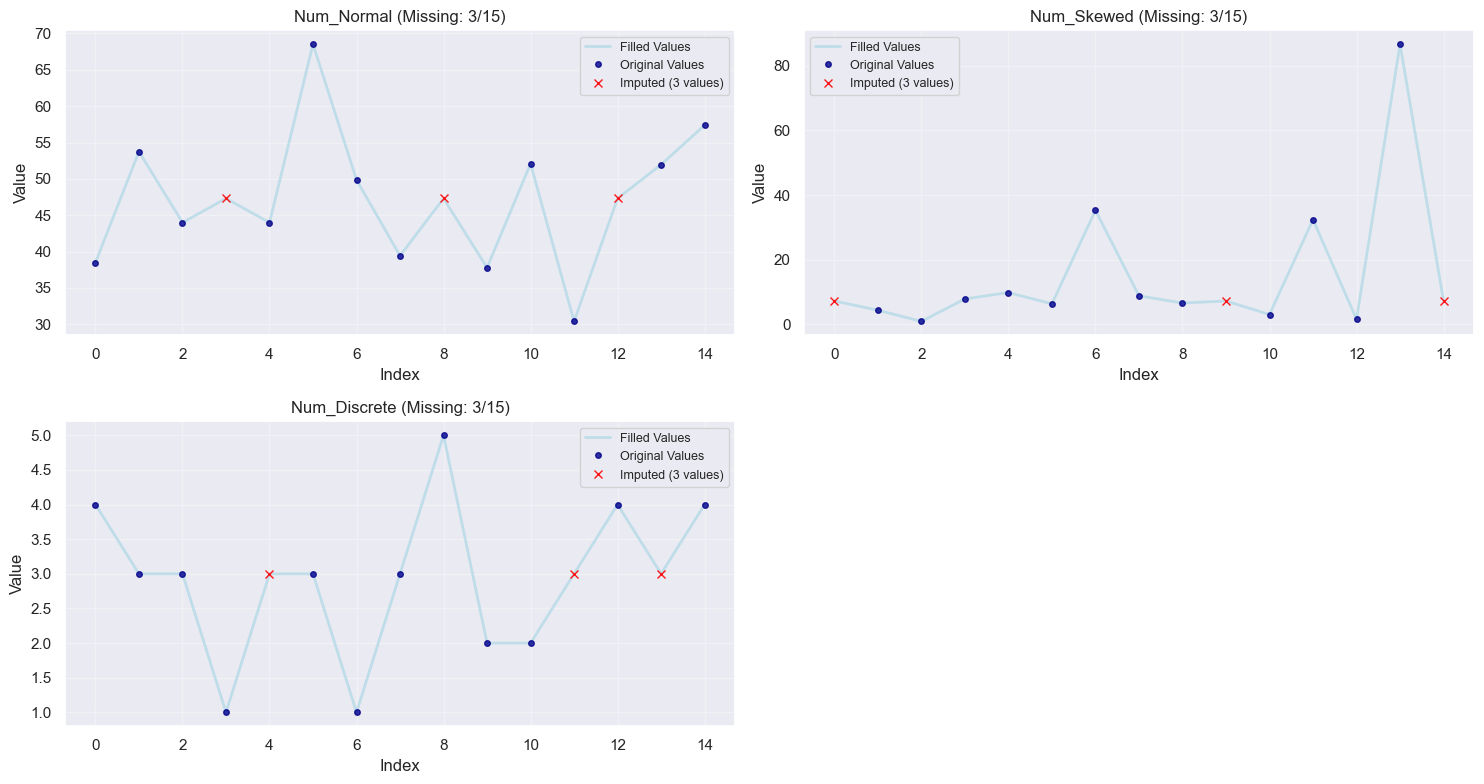

In [14]:
def plot_missing_values_comparison(df_original, df_filled, columns=None, figsize=(15, 8)):
    if columns is None:
        # Identify columns where missing counts changed (handled columns)
        cols_with_changes = []
        for col in df_original.columns:
            if df_original[col].isnull().sum() != df_filled[col].isnull().sum():
                cols_with_changes.append(col)
        columns = cols_with_changes
    if not columns:
        print("No columns with missing value handling detected!")
        return

    # Keep only numeric columns for plotting
    numeric_cols = [col for col in columns if pd.api.types.is_numeric_dtype(df_original[col])]
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 1) // 2  # 2 plots per row

    fig, axes = plt.subplots(n_rows, 2, figsize=figsize)
    if n_rows == 1:
        axes = [axes] if n_cols == 2 else [[axes, None]]
    elif n_cols == 1:
        axes = [[axes[0], None]]

    for i, col in enumerate(numeric_cols):
        row = i // 2
        col_idx = i % 2
        ax = axes[row][col_idx]

        # Original vs filled data
        original_data = df_original[col].copy()
        filled_data = df_filled[col].copy()

        # Plot filled values
        ax.plot(filled_data.index, filled_data, label='Filled Values', color='lightblue', linewidth=2, alpha=0.7)

        # Plot non-missing original values
        non_missing_mask = ~original_data.isnull()
        ax.plot(
            original_data[non_missing_mask].index,
            original_data[non_missing_mask],
            label='Original Values',
            color='darkblue', marker='o', markersize=4, linestyle='None', alpha=0.8
        )

        # Highlight imputed values
        missing_mask = original_data.isnull()
        if missing_mask.sum() > 0:
            ax.plot(
                filled_data[missing_mask].index,
                filled_data[missing_mask],
                label=f'Imputed ({missing_mask.sum()} values)',
                color='red', marker='x', markersize=6, linestyle='None', alpha=0.9
            )

        ax.set_title(f'{col} (Missing: {missing_mask.sum()}/{len(original_data)})')
        ax.set_xlabel('Index')
        ax.set_ylabel('Value')
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.3)

    # Hide empty subplots
    if n_cols % 2 == 1 and n_rows > 1:
        axes[-1][-1].set_visible(False)
    elif n_cols == 1:
        axes[0][1].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_missing_values_comparison(df, df1)         # df1 = df.copy() before handling missing values

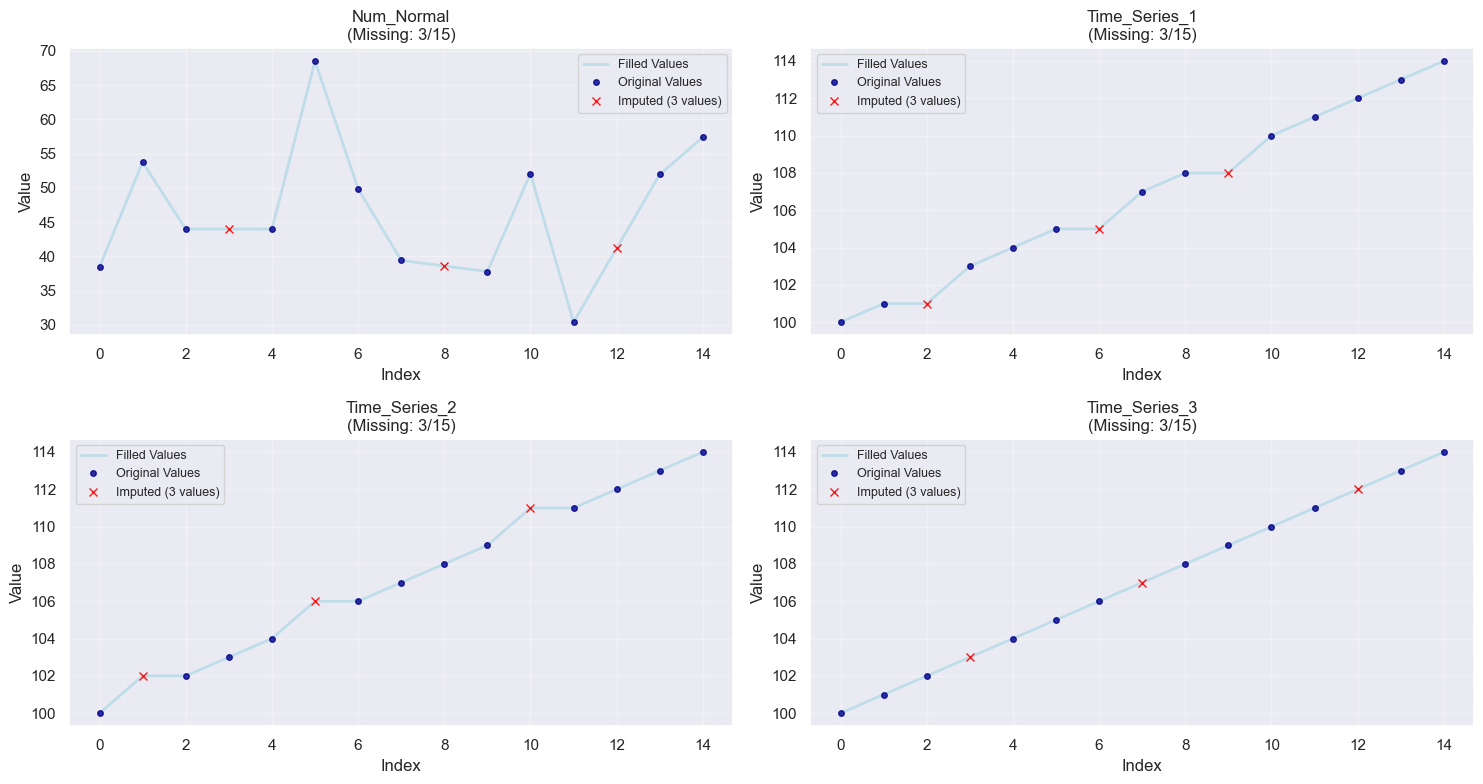

In [13]:
plot_missing_values_comparison(df, df2)

In [8]:
# ## -------- Interpolation Methods -------- ##
# # 1. Linear interpolation (default, numeric index)
# df['col'] = df['col'].interpolate(method='linear')

# # 2. Time interpolation (requires DatetimeIndex)
# df['col'] = df['col'].interpolate(method='time')

# # 3. Polynomial interpolation (fit polynomial curve, degree can be tuned)
# df['col'] = df['col'].interpolate(method='polynomial', order=2)

# # 4. Spline interpolation (smooth curves, specify order)
# df['col'] = df['col'].interpolate(method='spline', order=3)

# # 5. Nearest interpolation (assigns nearest known value, for discrete data also)
# df['col'] = df['col'].interpolate(method='nearest')

# # 6. Pad/Forward Fill
# df['col'] = df['col'].fillna(method='ffill')

# # 7. Backward Fill
# df['col'] = df['col'].fillna(method='bfill')

In [9]:
# from sklearn.impute import SimpleImputer

# # Choose strategy: mean (for normal), median (for skewed), most_frequent (for categorical), constant (custom value)
# imputer = SimpleImputer(strategy='mean', fill_value=None)
# X_imputed = imputer.fit_transform(X)


In [10]:
# ## -------- Iterative Imputer (Multivariate) -------- ##
# from sklearn.experimental import enable_iterative_imputer  # noqa
# from sklearn.impute import IterativeImputer

# iter_imputer = IterativeImputer(max_iter=10, random_state=0)
# X_iter_imputed = iter_imputer.fit_transform(X)

# ## -------- KNN Imputer (Similarity-based) -------- ##
# from sklearn.impute import KNNImputer

# knn_imputer = KNNImputer(n_neighbors=)
# X_knn_imputed = knn_imputer.fit_transform(X)